In [11]:
!pip list

Package                           Version  
--------------------------------- ---------
absl-py                           0.6.1    
alabaster                         0.7.12   
asn1crypto                        0.24.0   
astor                             0.7.1    
astroid                           2.2.5    
Babel                             2.6.0    
backcall                          0.1.0    
bleach                            3.0.2    
cachetools                        3.1.1    
catboost                          0.12.2   
certifi                           2019.6.16
cffi                              1.12.3   
chardet                           3.0.4    
Click                             7.0      
cloudpickle                       1.0.0    
colorama                          0.4.1    
colorlover                        0.3.0    
cryptography                      2.6.1    
cufflinks                         0.16     
cycler                            0.10.0   
Cython                          

In [1]:
import matplotlib as plt
import pystan
schools_dat = {'J': 8, 'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [3]:
sm = pystan.StanModel(model_code=schools_code)
%time fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


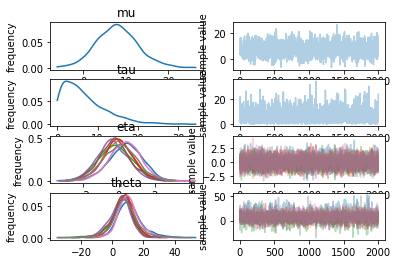

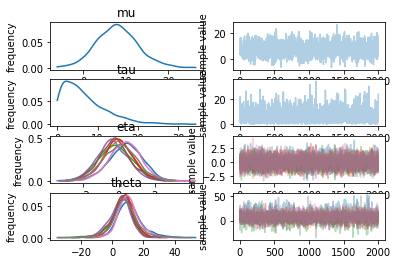

In [5]:
fit.plot()